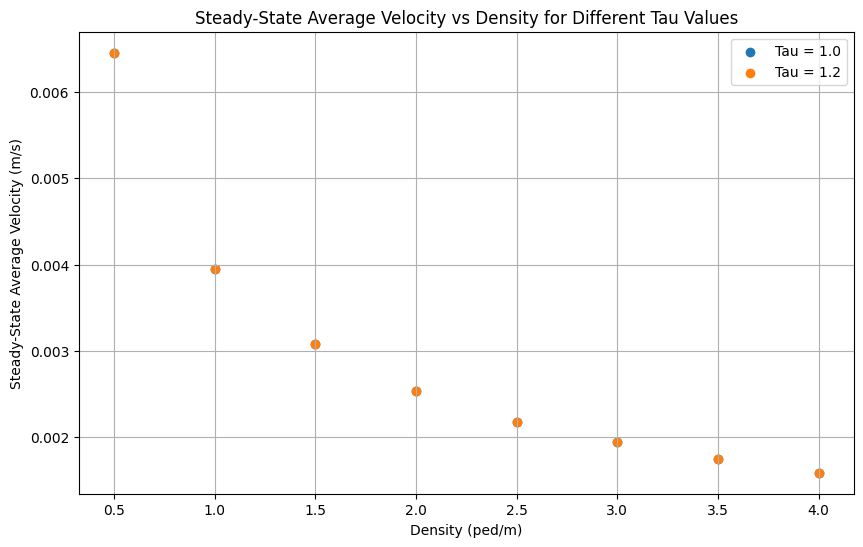

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re

# Directory where the files are saved
output_dir = './'  # Adjust if needed

dt = 0.001

# Regular expression to extract rho and tau from filenames
filename_pattern = r"traj_\d+_av[\d.]+_v0[\d.]+_tau([\d.]+)_rho([\d.]+).txt"

# Dictionary to store steady-state velocity data
velocity_data = {}

# Loop over all files in the directory
for filename in os.listdir(output_dir):
    # Match the filename pattern to extract tau and rho values
    match = re.match(filename_pattern, filename)
    if match:
        tau = float(match.group(1))
        rho = float(match.group(2))
        
        # Open and read the file data
        filepath = os.path.join(output_dir, filename)
        data = np.loadtxt(filepath, skiprows=1)  # Assuming the first row is a header
        
        
        # Extract time and velocity data
        times = np.unique(data[:, 1])  # Unique time frames
        vdt_sum = 0.0  # Sum of average velocities times dt (time step)
        
        # Loop over each time frame and compute the average velocity at that frame
        for t in times:
            time_frame_data = data[data[:, 1] == t]
            avg_velocity_at_t = np.mean(time_frame_data[:, 3])  # Column 3 is velocity
            vdt_sum += avg_velocity_at_t * dt  # Multiply velocity by time step (dt)
        
        # Total simulation time (final time frame)
        total_time = times.max()
        
        # Steady-state average velocity (sum of v*dt divided by total time)
        steady_state_velocity = vdt_sum / total_time
        
        # Store the result for this tau and rho
        if tau not in velocity_data:
            velocity_data[tau] = []
        velocity_data[tau].append((rho, steady_state_velocity))

# Plot the results
plt.figure(figsize=(10, 6))

for tau, values in velocity_data.items():
    values = np.array(values)  # Convert to NumPy array for easier handling
    plt.scatter(values[:, 0], values[:, 1], label=f'Tau = {tau}', marker='o')

# Add labels and title
plt.xlabel('Density (ped/m)')
plt.ylabel('Steady-State Average Velocity (m/s)')
plt.title('Steady-State Average Velocity vs Density for Different Tau Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
